In [1]:
#Data Exploration
#Question 1
import pandas as pd

# Define the column names
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load the dataset
file_path = 'https://raw.githubusercontent.com/jadgeitani/AAI614_Geitani/week4/AdultDataset/adult.data'
#file_path = 'adult.data'
df = pd.read_csv(file_path, header=None, names=column_names, skipinitialspace=True)

# Check the data types of each column
print("Detected Data Types:\n", df.dtypes)

# Compare with expected data types
expected_types = {
    'age': 'continuous',
    'workclass': 'categorical',
    'fnlwgt': 'continuous',
    'education': 'categorical',
    'education-num': 'continuous',
    'marital-status': 'categorical',
    'occupation': 'categorical',
    'relationship': 'categorical',
    'race': 'categorical',
    'sex': 'categorical',
    'capital-gain': 'continuous',
    'capital-loss': 'continuous',
    'hours-per-week': 'continuous',
    'native-country': 'categorical',
    'income': 'categorical'  # <=50K or >50K
}

for col, dtype in expected_types.items():
    print(f"{col}: Expected {dtype}, Detected {df[col].dtype}")


Detected Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object
age: Expected continuous, Detected int64
workclass: Expected categorical, Detected object
fnlwgt: Expected continuous, Detected int64
education: Expected categorical, Detected object
education-num: Expected continuous, Detected int64
marital-status: Expected categorical, Detected object
occupation: Expected categorical, Detected object
relationship: Expected categorical, Detected object
race: Expected categorical, Detected object
sex: Expected categorical, Detected object
capital-gain: Expected continuous, Detected int64
capital-loss: Expected continuous, Detected int64
hours-per-we

According to the description in file adult.names, the expected type of data (continuous, categorical) is different than that detected above (int64, object, float64)

In [2]:
#Data Exploration
#Question 2
import numpy as np

# Identify missing values representation (if any, e.g., '?')
df.replace('?', np.nan, inplace=True)

missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)


Missing Values per Column:
 age                 0
workclass         966
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        969
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    312
income              1
dtype: int64


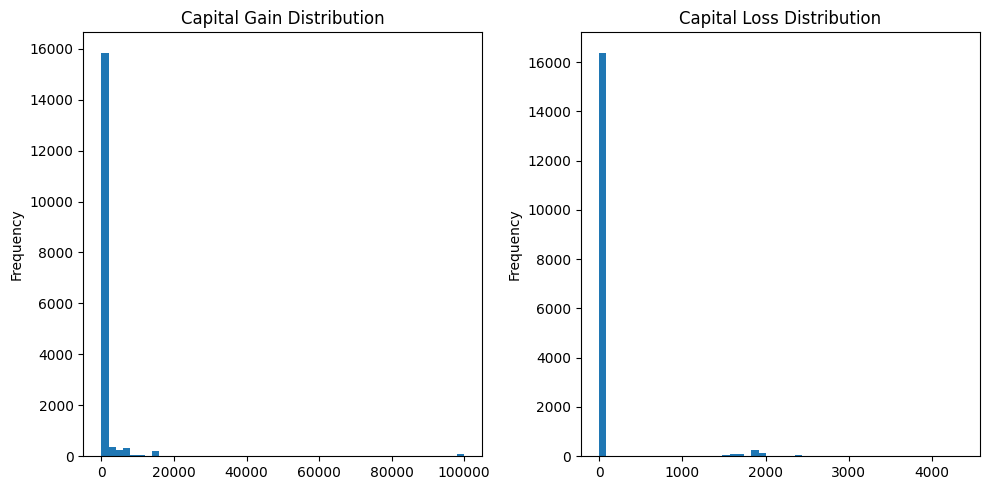

In [3]:
#Data Exploration
#Question 3
import matplotlib.pyplot as plt

# Plot distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['capital-gain'].plot(kind='hist', bins=50, title='Capital Gain Distribution')
plt.subplot(1, 2, 2)
df['capital-loss'].plot(kind='hist', bins=50, title='Capital Loss Distribution')
plt.tight_layout()
plt.show()

For both capital-gain and capital-loss, we can see that most values are concentrated near 0, with a small number of higher values. Therefore, the variables should be transformed into categorical variables.

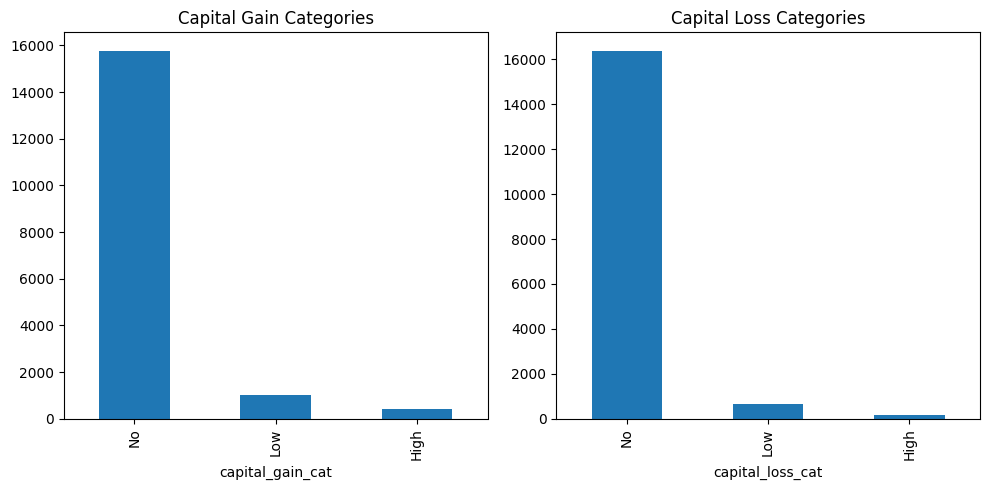

In [4]:
# Create categorical variables for capital_gain and capital_loss
def categorize_gain_loss(value, low_threshold, high_threshold):
    if value == 0:
        return 'No'
    elif value <= low_threshold:
        return 'Low'
    else:
        return 'High'

df['capital_gain_cat'] = df['capital-gain'].apply(lambda x: categorize_gain_loss(x, 10000, float('inf')))
df['capital_loss_cat'] = df['capital-loss'].apply(lambda x: categorize_gain_loss(x, 2000, float('inf')))

# Plot the new categorical distributions
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
df['capital_gain_cat'].value_counts().plot(kind='bar', ax=axes[0], title='Capital Gain Categories')
df['capital_loss_cat'].value_counts().plot(kind='bar', ax=axes[1], title='Capital Loss Categories')
plt.tight_layout()
plt.show()


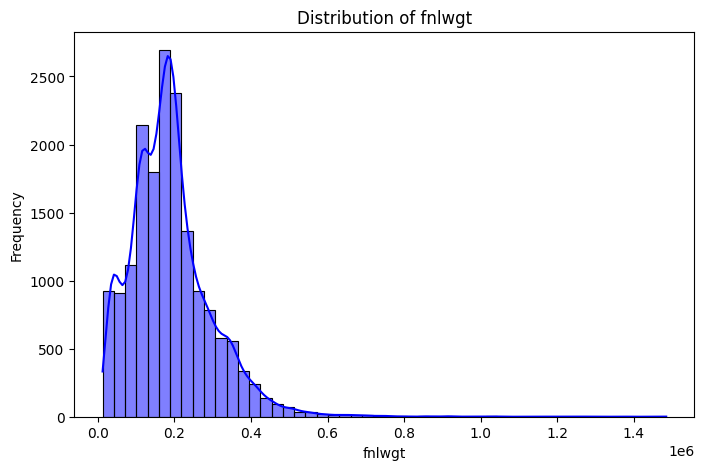

In [5]:
#Data Exploration
#Question 4-5
import seaborn as sns

#Plot the overall distribution of fnlwgt
plt.figure(figsize=(8, 5))
sns.histplot(df['fnlwgt'], bins=50, kde=True, color='blue')
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

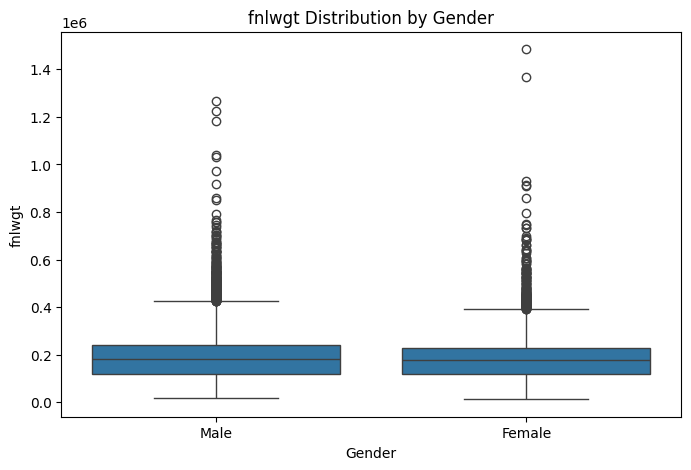

In [6]:
#Compare the distribution by sex
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sex', y='fnlwgt')
plt.title('fnlwgt Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('fnlwgt')
plt.show()

<ipython-input-7-9ca324795734>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['sex'] == 'Male', 'fnlwgt'], label='Male', shade=True)
<ipython-input-7-9ca324795734>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['sex'] == 'Female', 'fnlwgt'], label='Female', shade=True)


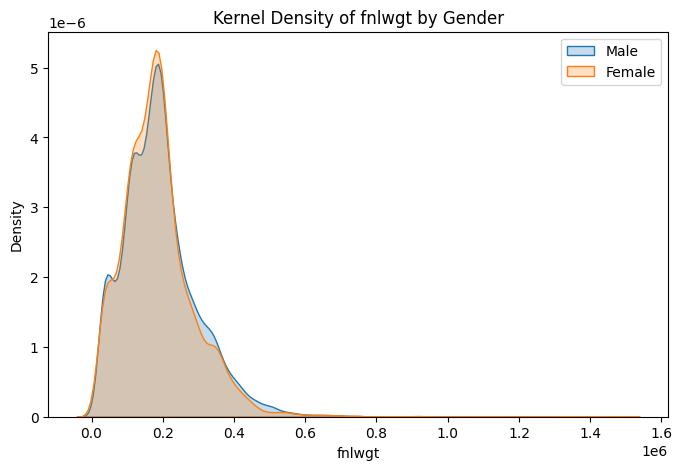

In [7]:
#Kernel density estimate (KDE) plot
plt.figure(figsize=(8, 5))
sns.kdeplot(df.loc[df['sex'] == 'Male', 'fnlwgt'], label='Male', shade=True)
sns.kdeplot(df.loc[df['sex'] == 'Female', 'fnlwgt'], label='Female', shade=True)
plt.title('Kernel Density of fnlwgt by Gender')
plt.xlabel('fnlwgt')
plt.legend()
plt.show()

In [8]:
print(df.groupby('sex')['fnlwgt'].describe())

          count           mean            std      min       25%       50%  \
sex                                                                          
Female   5662.0  185951.881491  103102.939866  12285.0  117833.0  175818.5   
Male    11527.0  192299.672942  106372.986267  19214.0  119156.0  180859.0   

             75%        max  
sex                          
Female  227594.0  1484705.0  
Male    241885.0  1268339.0  


In [9]:
#Handling Outliers
q1 = df['fnlwgt'].quantile(0.25)
q3 = df['fnlwgt'].quantile(0.75)
iqr = q3 - q1

In [10]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [11]:
#Setting the outliers to NaN
outliers = (df['fnlwgt'] < lower_bound) | (df['fnlwgt'] > upper_bound)
df.loc[outliers, 'fnlwgt'] = np.nan

print(f"Number of outliers set to NaN: {outliers.sum()}")

Number of outliers set to NaN: 516


Correlation Matrix:
                      age  education-num  hours-per-week
age             1.000000       0.026052        0.058150
education-num   0.026052       1.000000        0.148013
hours-per-week  0.058150       0.148013        1.000000


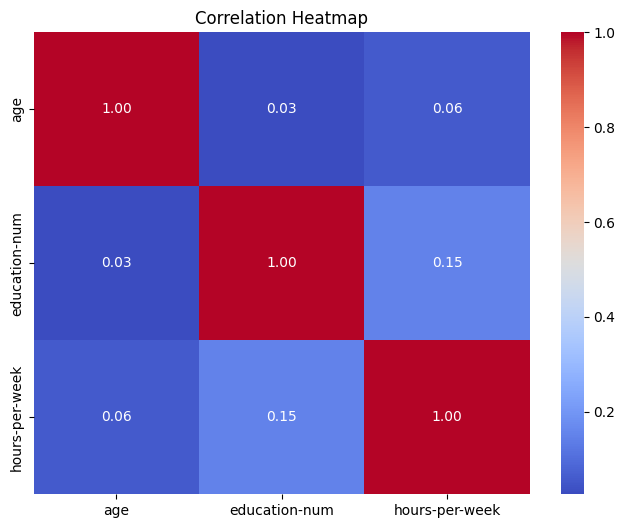

In [12]:
#Correlation
#Question 1
# Calculate correlations between age, education_num, and hours_per_week
correlation_matrix = df[['age', 'education-num', 'hours-per-week']].corr()

print("Correlation Matrix:\n", correlation_matrix)

# Heatmap to visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


From the obtained correlation matrix, we can see that age and education-num have a correlation of 0.033, age and hours-per-week have a correlation of 0.067, and education-num and hours-per-week have a correlation of 0.147. None of the above variables are highly correlated. However, education-num and hours-per-week show a slight positive correlation.

In [13]:
#Correlation
#Question 2
from scipy.stats import pearsonr

education_num = df['education-num'].dropna()
hours_per_week = df['hours-per-week'].dropna()

correlation, p_value = pearsonr(education_num, hours_per_week)

print(f"Correlation between education-num and hours-per-week: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")


Correlation between education-num and hours-per-week: 0.15
P-value: 0.0000
The correlation is statistically significant (p < 0.05).


The positive correlation between education-num and hours-per-week indicates that as education-num increases, hours-per-week also increases. And the p-value obtained (0) which is less than 0.05, confirms that the correlation is statistically significant. The correlation coefficient of 0.15 indicates a weak relationship which means that there are other factors than education-num that plays a larger role in determining hours-per-week.

In [14]:
#Correlation
#Question 3

male_data = df[df['sex'] == 'Male']
female_data = df[df['sex'] == 'Female']

male_corr, male_p = pearsonr(male_data['education-num'].dropna(), male_data['age'].dropna())
female_corr, female_p = pearsonr(female_data['education-num'].dropna(), female_data['age'].dropna())

print(f"Male Participants: Correlation between education_num and age: {male_corr:.2f}, p-value: {male_p:.4f}")
print(f"Female Participants: Correlation between education_num and age: {female_corr:.2f}, p-value: {female_p:.4f}")

if male_p < 0.05:
    print("  -> Male correlation is statistically significant.")
else:
    print("  -> Male correlation is not statistically significant.")

if female_p < 0.05:
    print("  -> Female correlation is statistically significant.")
else:
    print("  -> Female correlation is not statistically significant.")


Male Participants: Correlation between education_num and age: 0.05, p-value: 0.0000
Female Participants: Correlation between education_num and age: -0.03, p-value: 0.0347
  -> Male correlation is statistically significant.
  -> Female correlation is statistically significant.


The findings are expected due to histprical educational trends where in older generations, particularly women, had fewer education. Also, the weak correlations are reasonable since age and education are influenced by many other factors.

In [15]:
#Correlation
#Question 4

covariance_matrix = df[['education-num', 'hours-per-week']].cov()

print("Covariance Matrix:\n", covariance_matrix)

edu_hours_cov = covariance_matrix.loc['education-num', 'hours-per-week']
if edu_hours_cov > 0:
    print(f"The positive covariance ({edu_hours_cov:.2f}) indicates that as education increases, hours per week tend to increase.")
elif edu_hours_cov < 0:
    print(f"The negative covariance ({edu_hours_cov:.2f}) indicates that as education increases, hours per week tend to decrease.")
else:
    print(f"The covariance ({edu_hours_cov:.2f}) suggests no linear relationship between education and hours per week.")


Covariance Matrix:
                 education-num  hours-per-week
education-num        6.540076        4.645657
hours-per-week       4.645657      150.629292
The positive covariance (4.65) indicates that as education increases, hours per week tend to increase.


The covariance matrix confirms that education-num and hours-per-week have a weak positive relationship, with higher education levels generally associated with slightly more hours. However, this relationship is not strong, which means that other factors play a significant role in determining the hours-per-week.

In [16]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

df['sex_encoded'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

X = df[['sex_encoded']]
y = df['hours-per-week']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
slope = model.coef_[0]

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Coefficients:")
print(f"  Intercept: {intercept:.2f}")
print(f"  Slope (sex_encoded): {slope:.2f}")
print(f"\nModel Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  R-squared (R²): {r2:.2f}")


Model Coefficients:
  Intercept: 36.45
  Slope (sex_encoded): 6.03

Model Evaluation:
  Mean Absolute Error (MAE): 8.26
  R-squared (R²): 0.06


In [17]:
#Linear regression with education-num as a control variable


X = df[['sex_encoded', 'education-num']]
y = df['hours-per-week']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
coefficients = model.coef_

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:")
print(f"  Intercept: {intercept:.2f}")
print(f"  Slope (sex_encoded): {coefficients[0]:.2f}")
print(f"  Slope (education-num): {coefficients[1]:.2f}")

print("\nModel Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  R-squared (R²): {r2:.2f}")


Model Coefficients:
  Intercept: 29.40
  Slope (sex_encoded): 5.97
  Slope (education-num): 0.70

Model Evaluation:
  Mean Absolute Error (MAE): 8.12
  R-squared (R²): 0.08
